In [39]:
from get_airports import get_airport_popular_times, load_airports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import itertools
%matplotlib notebook
matplotlib.rc('xtick', labelsize=7) 



In [40]:
times = (get_airport_popular_times(airport) for airport in load_airports())
times = (time for time in times if time)
popular_times = [{time["name"]: time["data"] for time in day} for day in times]

days = list(popular_times[0].keys())

print(len(min((time[days[-1]] for time in popular_times), key=len)))

24


<IPython.core.display.Javascript object>


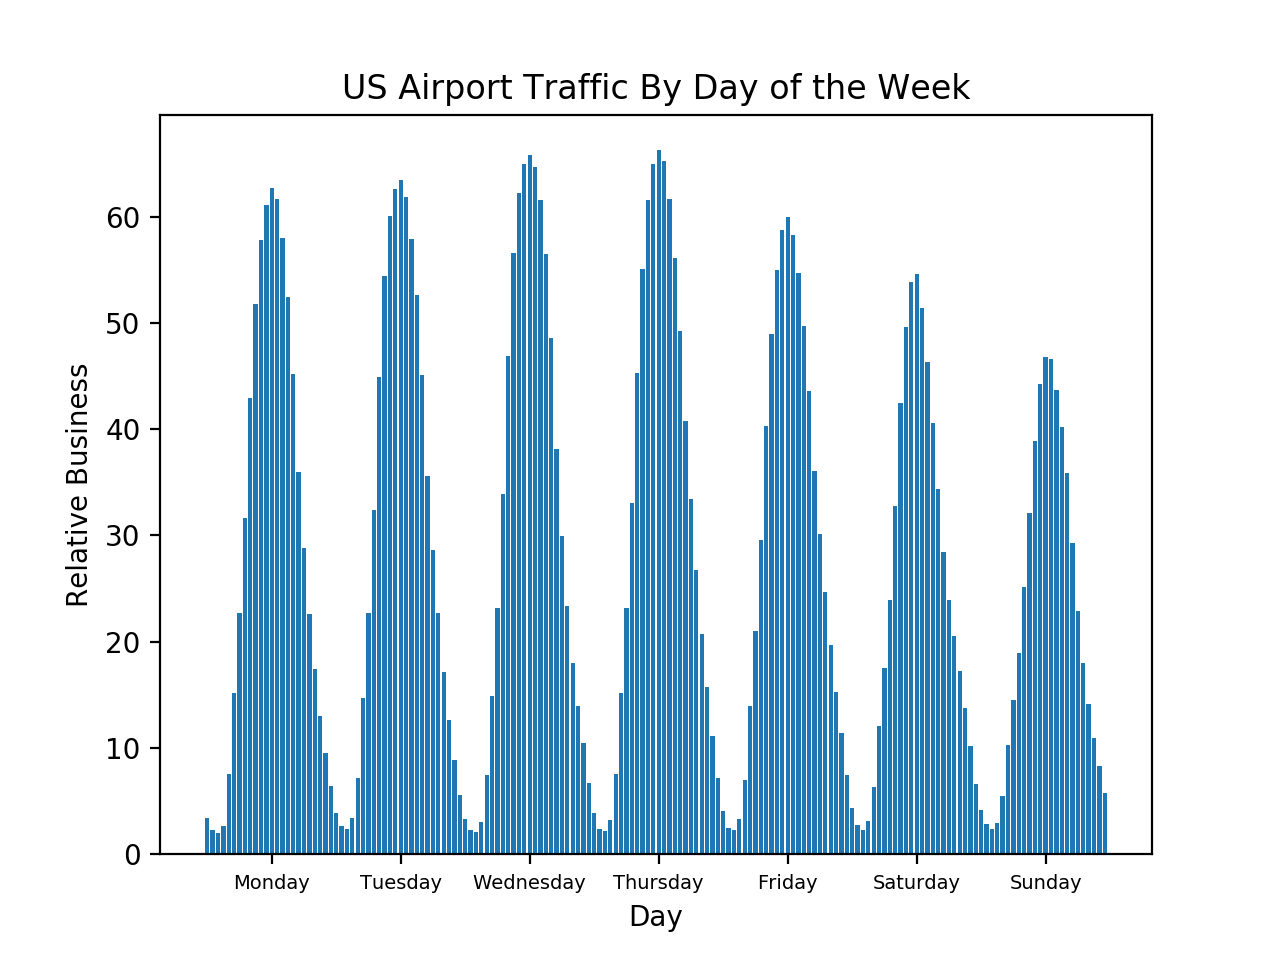

Text(0,0.5,'Relative Business')

In [48]:
times = np.array([np.array(list(itertools.chain(*[airport[day] if airport[day] else [0]*24 for day in days]))) for airport in popular_times]).mean(axis=0)
plt.bar(range(len(times)), times)
plt.xticks([x + 12 for x in range(0, len(times),24)], days)
plt.title("US Airport Traffic By Day of the Week")
plt.xlabel("Day")
plt.ylabel("Relative Business")
